# Finding Signal Peaks

There are all sorts of situations where we want to get a simple summary of interesting events in data. 
It's really useful to say "we had three bursts of sales activity, one just before Mothers' Day and the other
two around the time we started advertising". If you only have a handful of products, you can just eyeball this
but the challenge happens when you have a lot of products to keep track of.

Likewise, when did we get a surprising number of sign-ups? These are often the most informative signs of
a company hitting a real need.

Anyway, I hit this problem doing some astronomy lately. I was looking at a signal from a radio telescope 
which had been observing potential planetary nebulae in the Lesser Magellanic cloud. Here a "peak" in a 
signal corresponds to some element floating around in shrapnel of the shell of the planetary nebula
after it has exploded. For example there should be a spike around 5900 which corresponds to the radio
wavelength of hydrogen. Doppler gets in the way though -- the LMC is running away from us and so hydrogen is
nearly but not quite 5900. I wanted to get a technique that could find these automatically and calculate their
flux.

In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt
import scipy

That last cell won't frighten many data scientists, but the next one is a bit astronomy-specific. FITS is
a common astronomical format.

In [2]:
import astropy.io
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

In [3]:
FITS_FILE = '../wavelength-spectra/RP1576_r.fits'

In [4]:
image_file = get_pkg_data_filename(FITS_FILE)

You can find out about the file with some fits functions...

In [5]:
fits.info(image_file)

Filename: ../wavelength-spectra/RP1576_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     245   (3643,)   float32   


There are other functions for extracting the metadata (e.g. `fits.getheader(image_file)`) so that you know what
star you are observing.

But ultimately we just want the data. It comes out as a numpy array.

It is one data sample for each frequency that the telescope observed at.

In [6]:
image_data = fits.getdata(image_file, ext=0)

Life would be better if it came out as a pandas Series, but it doesn't
so we need to construct our own index. In the FITS file, CRVAL1 is the
lowest frequency and CDELT1 is the smallest frequency difference the
telescope can measure.

I could do this more efficiently with `numpy.arange` rather than a loop, 
but we only have a few thousand elements to create in this index, so 
performance doesn't matter much.

In [7]:
base_frequency = fits.getval(image_file,'CRVAL1')
frequency_step = fits.getval(image_file,'CDELT1')
number_of_frequencies = image_data.shape[0]
frequencies = []
for i in range(len(list(image_data))):
    frequencies.append(base_frequency + i * frequency_step)

Which means we can now create a pandas Series, and have a look at the data.

In [8]:
one_d_data = pandas.Series(index=frequencies, data=list(image_data))

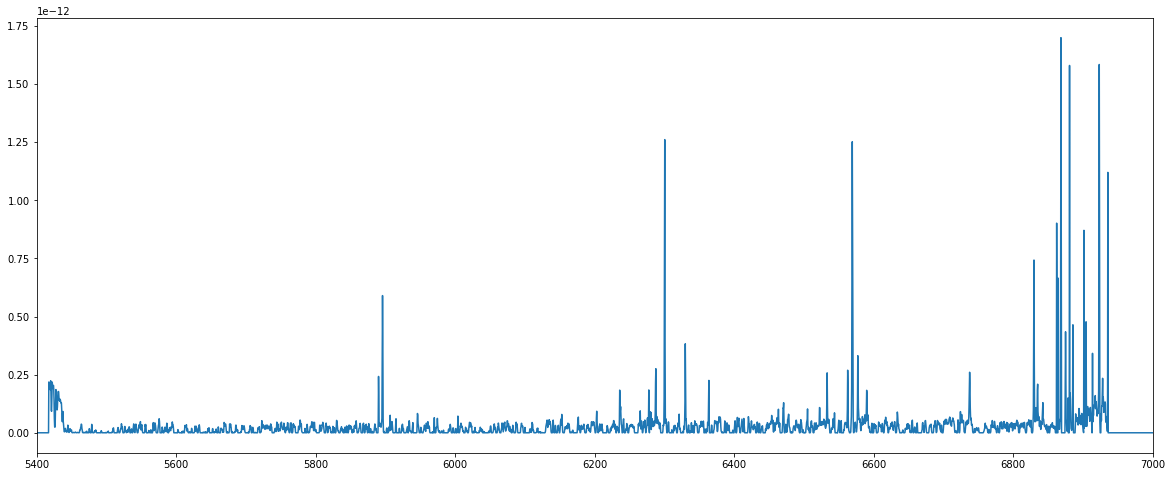

In [9]:
(fig,ax) = plt.subplots(1,1, figsize=(20,8))
one_d_data.plot(ax=ax)

Whenever I see a data set, I like to run a fitter over it. This is a brute-force 
trial of a very large number of distributions to see what it matches most closely.

If you're trying this at home, don't worry if these next two cells don't work for 
you. We don't need them. Also fitter-1.1.10 seems to have a compilation bug, so I
had to `pip install fitter==1.0.9` .

In [10]:
import fitter
f = fitter.Fitter(one_d_data)
f.fit()

/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=1.0187526854036873e+27)
Fitted anglit distribution with error=1.24880881975551e+27)
Fitted arcsine distribution with error=1.0568839471281063e+27)
Fitted argus distribution with error=1.2550168097130715e+27)
Fitted beta distribution with error=9.550276073023112e+25)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:562: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:566: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=9.580134405668747e+26)
Fitted bradford distribution with error=1.1410322140525121e+27)
Fitted burr distribution with error=1.1507652599336144e+27)
Fitted burr12 distribution with error=9.311004909321591e+26)
Fitted cauchy distribution with error=5.576123958399771e+25)
Fitted chi distribution with error=2.3056291211535263e+26)
Fitted chi2 distribution with error=2.9899496368015618e+26)
Fitted cosine distribution with error=1.24880881975551e+27)
Fitted dgamma distribution with error=4.110943487158833e+26)
Fitted dweibull distribution with error=4.443452677569923e+26)
Fitted erlang distribution with error=1.1789836004141438e+27)
Fitted expon distribution with error=4.555679176716046e+25)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00041666666666666664.
  RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-i

Fitted exponnorm distribution with error=3.479566555732682e+25)
Fitted exponpow distribution with error=5.5869544585824875e+26)
Fitted exponweib distribution with error=1.1348719655802131e+26)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:1429: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


Fitted f distribution with error=1.1607978512659466e+27)
Fitted fatiguelife distribution with error=1.26810251474453e+26)
Fitted fisk distribution with error=1.1937168791004626e+27)
Fitted foldcauchy distribution with error=1.1663675844911e+27)
Fitted foldnorm distribution with error=6.255971949437411e+26)
Fitted frechet_l distribution with error=1.2491752382746422e+27)
Fitted frechet_r distribution with error=7.736671526059272e+25)
Fitted gamma distribution with error=1.1478865615948446e+27)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:2595: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=5.574271680734167e+26)
Fitted genexpon distribution with error=4.562599777494623e+25)
Fitted genextreme distribution with error=6.866025859567548e+26)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:1902: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:1907: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


Fitted gengamma distribution with error=8.089141641098128e+25)
Fitted genhalflogistic distribution with error=1.3760314414727662e+26)
Fitted genlogistic distribution with error=2.368022719120234e+26)
Fitted gennorm distribution with error=7.482661020687298e+26)
Fitted genpareto distribution with error=1.14257350746962e+27)
Fitted gilbrat distribution with error=3.1360829404949155e+25)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:1761: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted gompertz distribution with error=6.142534283564817e+25)
Fitted gumbel_l distribution with error=1.1369273850577357e+27)
Fitted gumbel_r distribution with error=2.3619795330797462e+26)
Fitted halfcauchy distribution with error=6.349071670317232e+25)
Fitted halfgennorm distribution with error=5.06073145247193e+26)
Fitted halflogistic distribution with error=1.383252588825835e+26)
Fitted halfnorm distribution with error=6.256486058433385e+26)
Fitted hypsecant distribution with error=3.3217548159843725e+26)
Fitted invgamma distribution with error=1.102717733092723e+27)
Fitted invgauss distribution with error=1.048760338536299e+26)


/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted invweibull distribution with error=1.0414010311181017e+27)
Fitted johnsonsb distribution with error=2.0492025687366354e+26)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:2835: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))


Fitted johnsonsu distribution with error=9.700545241733923e+26)
Fitted kappa3 distribution with error=1.3298927237095612e+25)
Fitted kappa4 distribution with error=9.637290702704951e+26)


/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:43: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


Fitted ksone distribution with error=1.2146134328824995e+27)


/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


Fitted kstwobign distribution with error=8.252589608939638e+26)
Fitted laplace distribution with error=2.5225786416831535e+26)
Fitted levy distribution with error=1.6544892233089693e+26)
Fitted levy_l distribution with error=1.2362609785508319e+27)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=8.676168168000447e+26)
Fitted logistic distribution with error=3.81818838298152e+26)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:3165: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:3156: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Fitted loglaplace distribution with error=1.2012824769956621e+27)
Fitted lognorm distribution with error=5.823214723602348e+25)
Fitted lomax distribution with error=1.121855109616253e+27)
Fitted maxwell distribution with error=7.349826531749824e+26)


/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:3361: RuntimeWarning: divide by zero encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)


Fitted mielke distribution with error=1.1504380820353824e+27)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:3692: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Fitted nakagami distribution with error=3.081246819962768e+26)
Fitted ncf distribution with error=1.1439627285858398e+27)
Fitted nct distribution with error=5.7556853169613665e+25)
Fitted ncx2 distribution with error=2.0121434074375967e+26)
Fitted norm distribution with error=8.420395897050436e+26)
Fitted pareto distribution with error=1.0430753514733742e+25)
Fitted pearson3 distribution with error=1.2510416335279182e+26)
Fitted powerlaw distribution with error=7.317707114430567e+26)
Fitted powerlognorm distribution with error=5.349327239924879e+25)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=7.196856430048683e+26)
Fitted rdist distribution with error=1.24880881975551e+27)
Fitted recipinvgauss distribution with error=6.174424248838602e+25)
Fitted reciprocal distribution with error=1.24880881975551e+27)
Fitted rice distribution with error=7.19641646465469e+26)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=1.24880881975551e+27)
Fitted skewnorm distribution with error=6.25760680583395e+26)
Fitted t distribution with error=6.991708245269382e+26)
Fitted trapz distribution with error=1.2669274044871797e+27)
Fitted triang distribution with error=1.1660920586595508e+27)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:4693: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:4742: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:4846: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:4846: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncexpon distribution with error=1.1775154844568629e+27)
Fitted truncnorm distribution with error=1.24880881975551e+27)


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:4904: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


Fitted tukeylambda distribution with error=4.102040245389511e+26)
Fitted uniform distribution with error=1.2142111697647919e+27)
Fitted vonmises distribution with error=1.4148756500062745e+75)
Fitted vonmises_line distribution with error=1.24880881975551e+27)
Fitted wald distribution with error=7.497196692511865e+24)
Fitted weibull_max distribution with error=1.2491752382746422e+27)
Fitted weibull_min distribution with error=7.736671526059272e+25)
Fitted wrapcauchy distribution with error=nan)


/usr/lib/python3/dist-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


levy_stable was not fitted. no parameters available
rv_continuous was not fitted. no parameters available
rv_histogram was not fitted. no parameters available


,sumsquare_error
levy_stable,1.000000e+06
rv_continuous,1.000000e+06
rv_histogram,1.000000e+06
wald,7.497197e+24
pareto,1.043075e+25


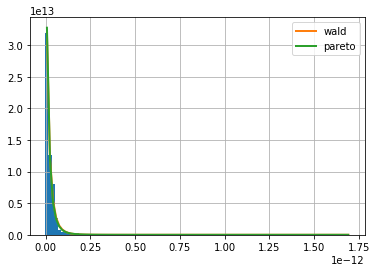

In [11]:
f.summary()

Summary: this data set looks like no earthly distribution. Which is appropriate really for a dataset
that started on its journey 160,000 years ago.

Just as a reminder, it's definitely not a gaussian, so it's not true to say "3 standard deviations
away from the mean gives you a 1% probability".

It's entirely co-incidental that the dotted line looks like it belongs there as a divider:

In [12]:
mean_signal_strength = one_d_data.mean()
stddev_signal_strength = one_d_data.std()
three_stddevs = mean_signal_strength + 3 * stddev_signal_strength
print ("Mean is ", mean_signal_strength)
print ("Standard deviation is ", stddev_signal_strength)
print ("Initial threshold is ", three_stddevs)

Mean is  2.7669993565e-14
Standard deviation is  8.06450227709e-14
Initial threshold is  2.69605061878e-13


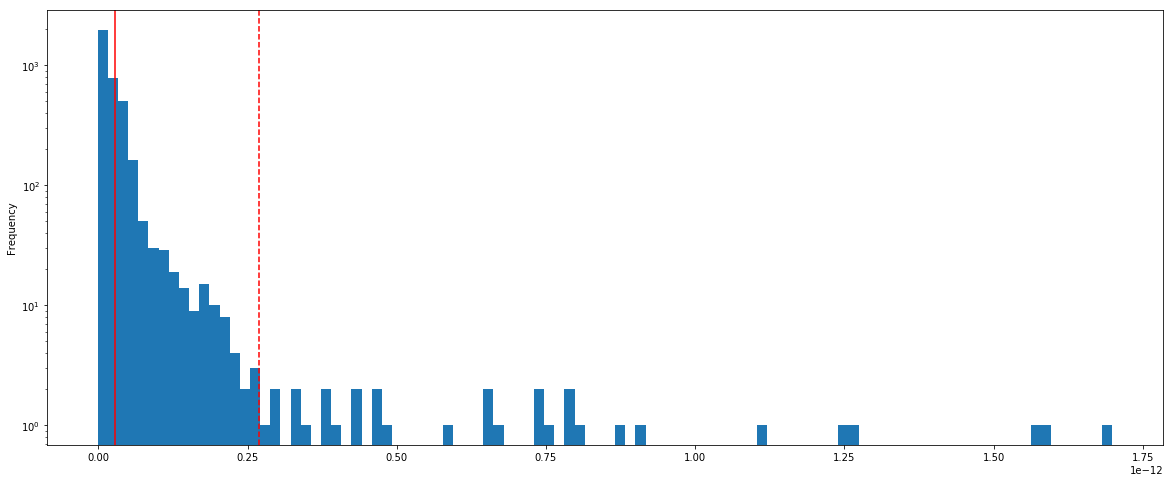

In [13]:
(fig,ax) = plt.subplots(1,1)
one_d_data.plot.hist(bins=100, figsize=(20,8), log=True, ax=ax)
ax.axvline(mean_signal_strength, c="red")
ax.axvline(three_stddevs, c="red", linestyle="--")

There's actually a nasty little mistake there, that could come back to bite us later.

The mean and standard deviation was calculated using the background noise and the spikes of the whole dataset. That's not good, because it makes the mean and standard deviation much higher than it "should" be if the peaks were excluded.

So let's take a tentative shot at wiping out things that are likely to be spikes and then recalculating the mean, standard deviation and distribution.

In [14]:
background_noise = one_d_data.copy()
background_noise[one_d_data > three_stddevs] = mean_signal_strength

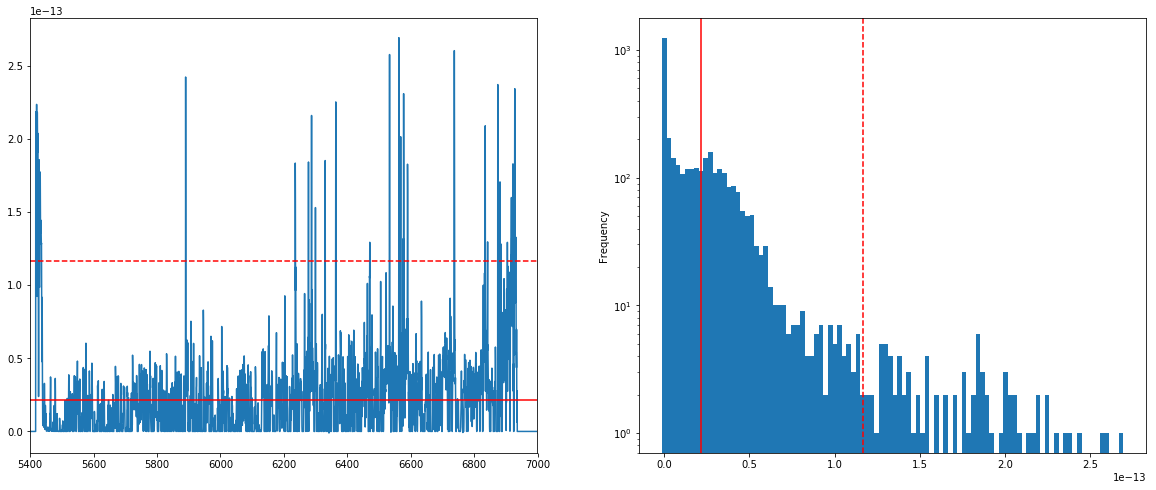

In [15]:
(fig, ax) = plt.subplots(1,2, figsize=(20,8))
background_noise.plot(ax=ax[0])
ax[0].axhline(background_noise.mean(), c="red")
ax[0].axhline(background_noise.mean() + 3 * background_noise.std(), c="red", linestyle="--")

background_noise.plot.hist(ax=ax[1], bins=100, log=True)
ax[1].axvline(background_noise.mean(), c="red")
ax[1].axvline(background_noise.mean() + 3 * background_noise.std(), c="red", linestyle="--")

It's hard to say that the line around 5890 isn't some kind of peak that's substantially different to the data around it!

Maybe we should do it again, and keep on going until fitter says that we have something gaussian (or some other random distribution).

But let's just stop here since we've converged pretty quickly already. The remainder aren't going to add much.

Let's go back to the data and drop anything that's below this new threshold.

Text(0.5,1,'../wavelength-spectra/RP1576_r.fits with background noise removed')

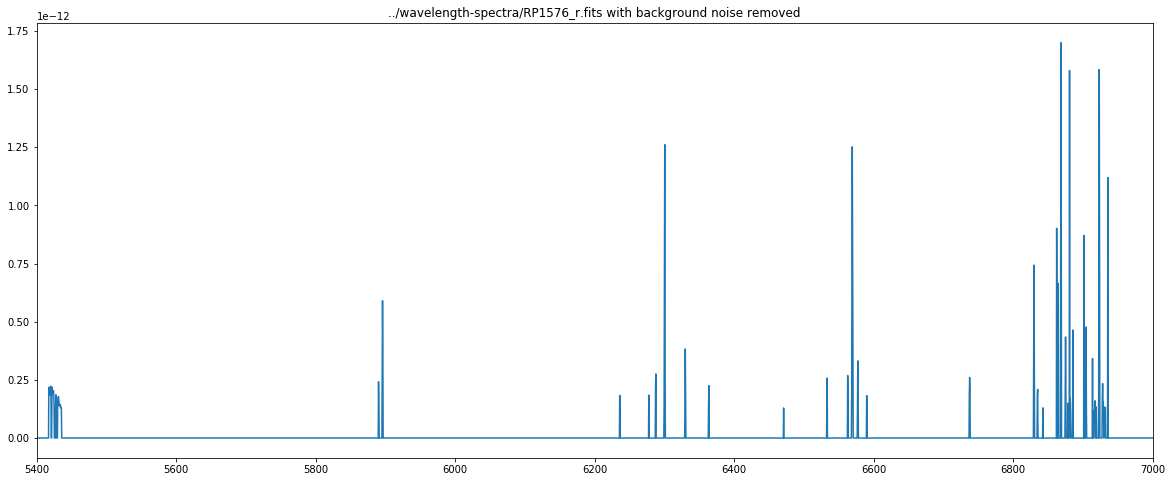

In [16]:
(fig, ax) = plt.subplots(1,1)
noise_threshold = background_noise.mean() + 3 * background_noise.std()
no_background_noise = one_d_data.copy()
no_background_noise[one_d_data < noise_threshold] = 0.0
no_background_noise.plot(figsize=(20,8), ax=ax)
ax.set_title(FITS_FILE + " with background noise removed")

They look like very fine lines, but let's zoom in from 6200 - 6400, and it's not quite that simple.

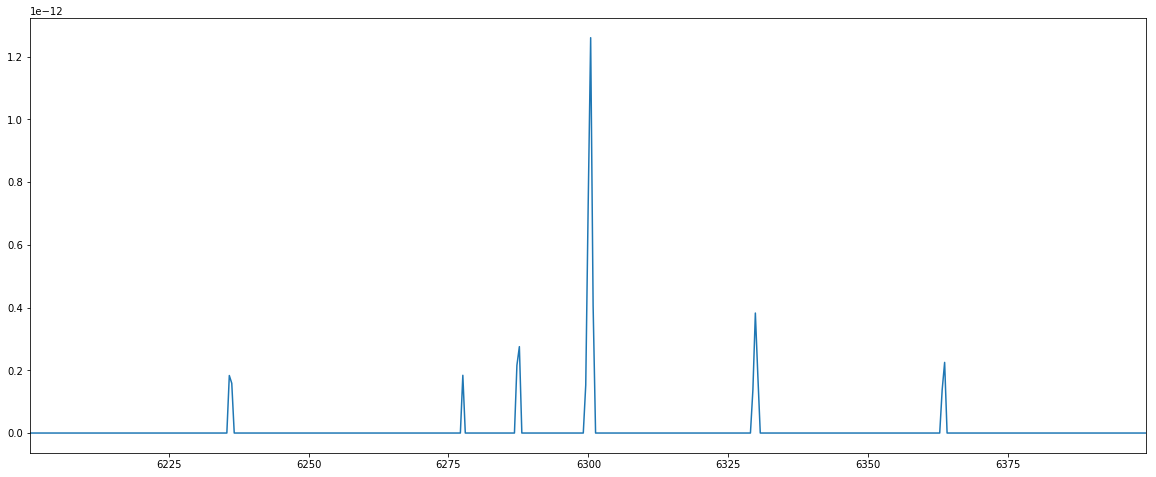

In [17]:
no_background_noise[6200:6400].plot(figsize=(20,8))

So we need to associate a "peak number" with any continuous sequence of non-zero measurements.

In [18]:
current_peak_number = 0
in_a_peak_right_now = False
last_seen_frequency = None
strongest_signal_in_peak = None
frequency_of_strongest_signal = None

peaks = {}

In [19]:
for frequency in no_background_noise.index:
    measurement = no_background_noise.loc[frequency]
    if measurement == 0 and not(in_a_peak_right_now):
        # Then we're in one of those long gaps
        continue
    if measurement > 0.0 and in_a_peak_right_now:
        # Then we're inside a peak.
        last_seen_frequency = frequency
        if measurement > strongest_signal_in_peak:
            strongest_signal_in_peak = measurement
            frequency_of_strongest_signal = frequency
        continue
    if measurement > 0.0 and not(in_a_peak_right_now):
        # Then we are at the start of seeing a peak
        current_peak_number += 1
        in_a_peak_right_now = True
        last_seen_frequency = frequency
        peaks[current_peak_number] = {'lowest_frequency' : frequency}
        strongest_signal_in_peak = measurement
        frequency_of_strongest_signal = frequency
        continue
    if measurement == 0 and in_a_peak_right_now:
        # Then we just popped out the end of seeing a peak
        peaks[current_peak_number]['highest_frequency'] = last_seen_frequency
        peaks[current_peak_number]['strongest_signal'] = strongest_signal_in_peak
        peaks[current_peak_number]['peak_strength_frequency'] = frequency_of_strongest_signal
        in_a_peak_right_now = False
        last_seen_frequency = False
        strongest_signal_in_peak = None
        frequency_of_strongest_signal = None
if in_a_peak_right_now:
    peaks[current_peak_number]['highest_frequency'] = last_seen_frequency
    peaks[current_peak_number]['strongest_signal'] = strongest_signal_in_peak
    peaks[current_peak_number]['peak_strength_frequency'] = frequency_of_strongest_signal

In [20]:
peak_df = pandas.DataFrame.from_dict(peaks, orient='index')
peak_df.sample(5)

,lowest_frequency,highest_frequency,strongest_signal,peak_strength_frequency
37,6930.264514,6932.021420,1.327232e-13,6931.582193
8,6277.574196,6277.574196,1.841486e-13,6277.574196
32,6913.573914,6913.573914,3.416400e-13,6913.573914
28,6880.631940,6881.949619,1.579586e-12,6880.631940
38,6935.535230,6935.535230,1.119770e-12,6935.535230


Just for fun, let's overlay that information on to the original graph.

Text(0.5,1,'Peaks in the observed flux in ../wavelength-spectra/RP1576_r.fits')

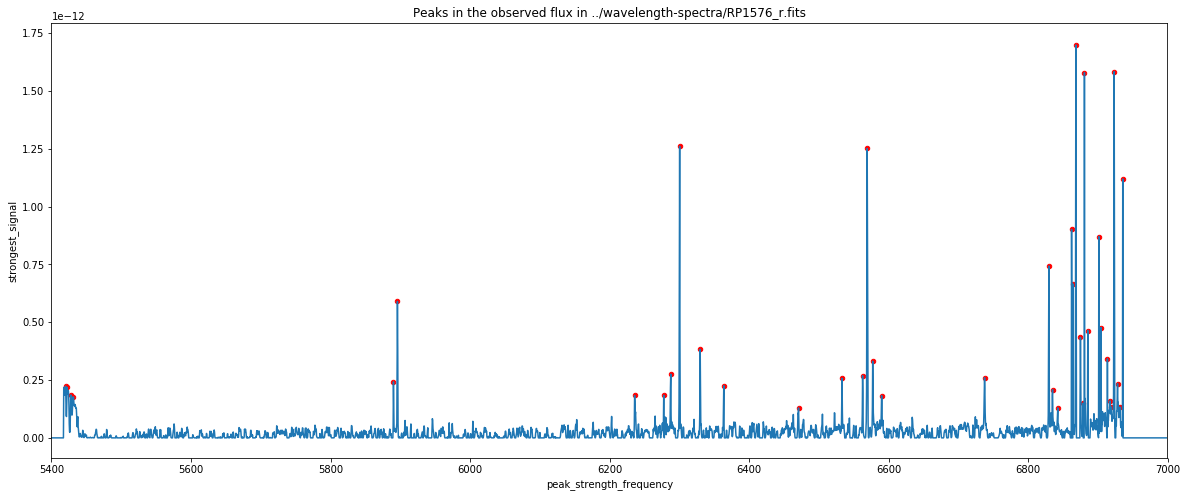

In [21]:
(fig, ax) = plt.subplots(1,1,figsize=(20,8))
one_d_data.plot(ax=ax)
peak_df.plot.scatter(x='peak_strength_frequency', y='strongest_signal', style='r+', ax=ax, c="red")
ax.set_title("Peaks in the observed flux in " + FITS_FILE)

## Calculating the flux

Essentially we want to integrate with respect to frequency in each of those peaks.

Since we only have rectangles (we don't have continuous data), we can calculate the sum of the 
lengths of the rectangles and multiply it by their (constant) width.

In [22]:
flux_indexes = []
flux_strengths = []
for frequency in peak_df.index:
    low = peak_df.loc[frequency]['lowest_frequency']
    high = peak_df.loc[frequency]['highest_frequency']
    strength = no_background_noise[low:high].sum() * frequency_step
    flux_indexes.append(frequency)
    flux_strengths.append(strength)
peak_df['total_flux'] = pandas.Series(index=flux_indexes, data=flux_strengths)
peak_df.sample(5)

,lowest_frequency,highest_frequency,strongest_signal,peak_strength_frequency,total_flux
29,6885.024203,6885.463429,4.643283e-13,6885.463429,2.601775e-13
13,6470.833779,6470.833779,1.292762e-13,6470.833779,5.678149e-14
23,6862.184434,6862.623661,9.014830e-13,6862.184434,5.993221e-13
10,6299.535513,6300.853192,1.260736e-12,6300.413965,1.120110e-12
37,6930.264514,6932.021420,1.327232e-13,6931.582193,2.752547e-13


Here's a nice comparison to show how far we came.

Text(0.5,1,'Original signal for ../wavelength-spectra/RP1576_r.fits')

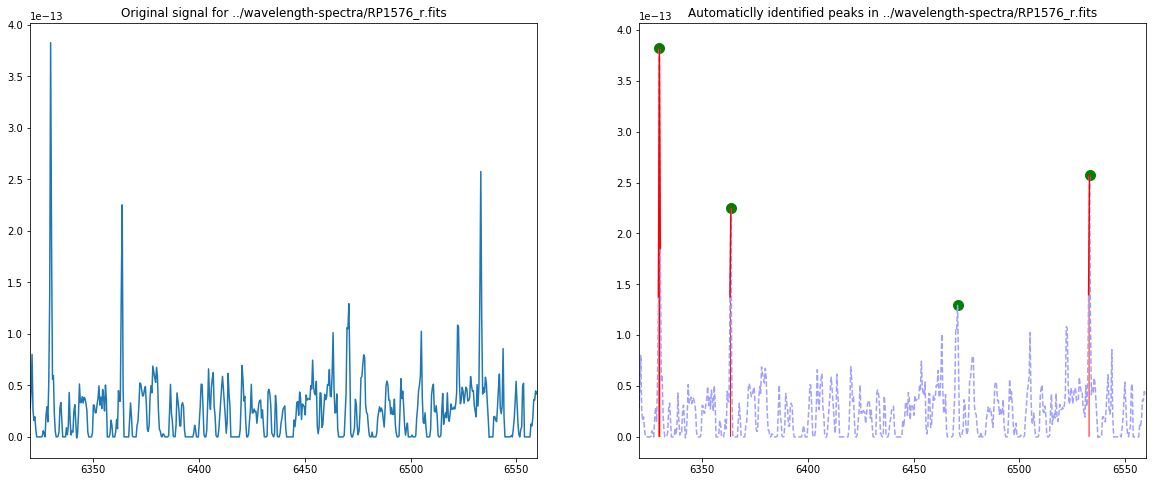

In [23]:
(fig, ax) = plt.subplots(1,2,figsize=(20,8))
zoomed_area = one_d_data[6320:6560]
def in_peak(x):
    for i in peak_df.index:
        row = peak_df.loc[i]
        if row.lowest_frequency < x and x < row.highest_frequency:
           return True
    return False
colouring = ["red" if in_peak(x) else "blue" for x in list(zoomed_area.index)]
zoomed_area.plot(ax=ax[1], c="#a0a0ff", linestyle="--")
zoomed_area.plot(ax=ax[0])
for i in peak_df.index:
    row = peak_df.loc[i]
    temp =  zoomed_area[row.lowest_frequency:row.highest_frequency]
    if temp.shape[0] != 0:
        temp.plot(ax=ax[1], c="red")
        ax[1].fill_between(temp.index, 0, temp, facecolor="red", interpolate=True)
        ax[1].scatter(x=[row.peak_strength_frequency], y=[row.strongest_signal], c="green", marker="o", s=100)
ax[1].set_title("Automaticlly identified peaks in " + FITS_FILE)
ax[0].set_title("Original signal for " + FITS_FILE)